# Notebook 5: Validating the PCA with a t-SNE Plot, Plotting Album Comparisons

### Introduction

To ensure that I didn't lose too much data with the PCA, I will plot each album on a t-SNE plot and look at how the albums cluster by their assigned genre.

In [1]:
import pandas as pd
import numpy as np
import pickle
import sys

sys.setrecursionlimit(1000000) #to allow pickling

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns



### Prepare Components and Genre Data for Plotting

In [2]:
with open('../data/components_by_album.pickle', 'rb') as read_file:
    components_by_album = pickle.load(read_file)
with open('../data/album_genre.pickle', 'rb') as read_file:
    album_genre_final = pickle.load(read_file)

In [3]:
components_by_album

,0,1,2,3,4,5,6
album_artist,,,,,,,
album:'Sno Angel Like You artist:Howe Gelb,0.438139,-0.784680,-0.438254,-0.327055,0.078635,-0.284540,-0.079157
album:(After) [Live] artist:Mount Eerie,1.207571,0.160679,1.549967,-2.063090,1.285474,-0.502250,-0.686779
album:1988 artist:Blueprint,-1.816842,-0.681018,0.662502,-0.800187,0.943576,0.337509,0.323383
album:1991 [EP] artist:Azealia Banks,-1.470744,-0.908225,1.798601,0.827642,0.024125,0.001905,0.295101
"album:22, A Million artist:Bon Iver",2.002804,-0.743673,-0.167331,-0.308177,-0.165739,0.011133,-0.461295
...,...,...,...,...,...,...,...
album:uknowhatimsayin¿ artist:Danny Brown,-1.300955,-0.856804,-0.118266,-1.091831,1.149641,0.237218,0.147607
album:untitled unmastered. artist:Kendrick Lamar,-0.089747,-1.255659,1.259076,-1.188558,1.146739,-0.351176,0.346931
album:xx artist:The xx,-1.869674,0.348611,0.063678,-0.248160,0.130817,-0.011628,-0.371989


In [4]:
genre_components = components_by_album.merge(album_genre_final, on ='album_artist')

In [5]:
genre_components

,album_artist,0,1,2,3,4,5,6,genre
0,album:'Sno Angel Like You artist:Howe Gelb,0.438139,-0.784680,-0.438254,-0.327055,0.078635,-0.284540,-0.079157,Other
1,album:(After) [Live] artist:Mount Eerie,1.207571,0.160679,1.549967,-2.063090,1.285474,-0.502250,-0.686779,Indie
2,album:1988 artist:Blueprint,-1.816842,-0.681018,0.662502,-0.800187,0.943576,0.337509,0.323383,AlternativeRnB-IndieSoul
3,album:1991 [EP] artist:Azealia Banks,-1.470744,-0.908225,1.798601,0.827642,0.024125,0.001905,0.295101,AlternativeRnB-IndieSoul
4,"album:22, A Million artist:Bon Iver",2.002804,-0.743673,-0.167331,-0.308177,-0.165739,0.011133,-0.461295,ArtRock-SlowCore
...,...,...,...,...,...,...,...,...,...
987,album:uknowhatimsayin¿ artist:Danny Brown,-1.300955,-0.856804,-0.118266,-1.091831,1.149641,0.237218,0.147607,HipHop-Rap
988,album:untitled unmastered. artist:Kendrick Lamar,-0.089747,-1.255659,1.259076,-1.188558,1.146739,-0.351176,0.346931,HipHop-Rap
989,album:xx artist:The xx,-1.869674,0.348611,0.063678,-0.248160,0.130817,-0.011628,-0.371989,Other
990,album:Ágætis Byrjun artist:Sigur Rós,2.220293,1.942850,-0.100979,0.451970,0.457325,-0.216176,-0.251684,Dance-Electronica


### Prepare t-SNE

In [6]:
#default perplexity is 30, doesn't seem to do better with other values (tried 5, 10, 15,
#20, 25, 35)
tsne_model = TSNE(n_components = 2, random_state = 0, verbose = 2)

In [7]:
low_data = tsne_model.fit_transform(genre_components.iloc[:, 1:8])
x,y = zip(*low_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.005s...
[t-SNE] Computed neighbors for 992 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.510056
[t-SNE] Computed conditional probabilities in 0.123s
[t-SNE] Iteration 50: error = 68.3403473, gradient norm = 0.2779420 (50 iterations in 0.381s)
[t-SNE] Iteration 100: error = 66.7123260, gradient norm = 0.2506374 (50 iterations in 0.336s)
[t-SNE] Iteration 150: error = 66.3058777, gradient norm = 0.2475587 (50 iterations in 0.337s)
[t-SNE] Iteration 200: error = 66.1513367, gradient norm = 0.2486913 (50 iterations in 0.334s)
[t-SNE] Iteration 250: error = 66.2115784, gradient norm = 0.2531378 (50 iterations in 0.390s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.211578
[t-SNE] Iteration 300: error = 1.1092111, gradient norm = 0.0006967 (50 iterations in 0.254s)
[t-SNE] Iteration 350: error = 1.0495777, gradient norm = 0.0002147 (

### Plot t-SNE results

In [8]:
to_plot = pd.DataFrame([x,y,genre_components.genre]).T
to_plot.columns = ['x', 'y', 'genre']

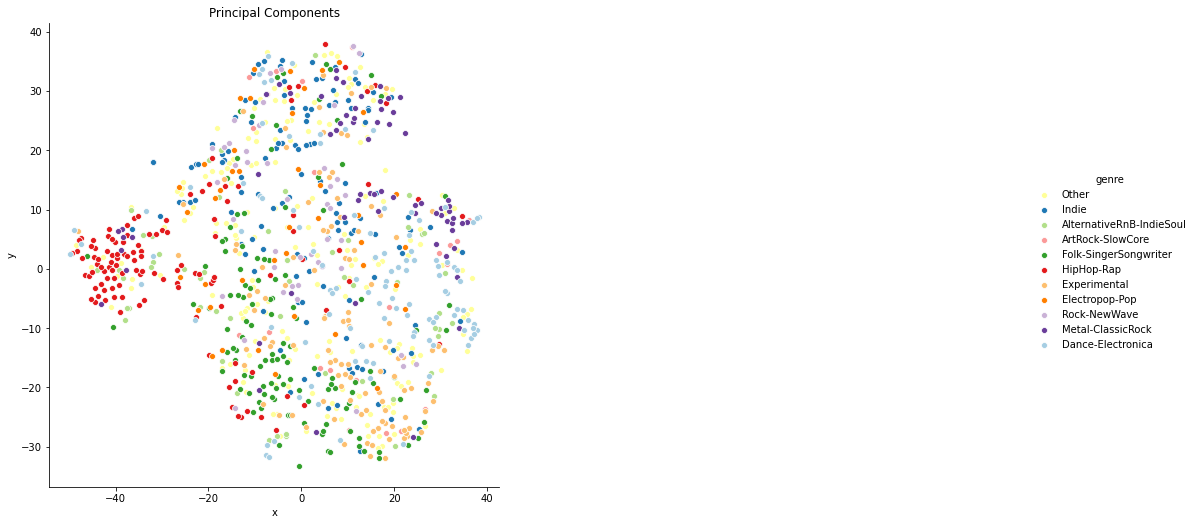

In [9]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot, hue = 'genre', 
                 palette = ['#ffff99', '#1f78b4', '#b2df8a', '#fb9a99', '#33a02c', '#e31a1c', '#fdbf6f',
                            '#ff7f00', '#cab2d6', '#6a3d9a', '#a6cee3'])
g.fig.set_size_inches(20, 8)
axes = g.axes.flatten()
axes[0].set_title("Principal Components");
#plt.savefig('../../slide_img/PCAtsne_new.png', transparent = True, bbox_inches='tight', dpi=300);

### Plot t-SNE results by genre

These plots may be useful if the cluster above is not easily viewed.

In [10]:
genre_dummies = pd.get_dummies(genre_components.genre)

In [11]:
to_plot_dummies = pd.concat([pd.DataFrame([x,y]).T, genre_dummies], axis = 1)
to_plot_dummies.columns = ['x', 'y', 'AlternativeRnB-IndieSoul', 'ArtRock-SlowCore', 'Dance-Electronica',
       'Electropop-Pop', 'Experimental', 'Folk-SingerSongwriter',
       'HipHop-Rap', 'Indie', 'Metal-ClassicRock', 'Other', 'Rock-NewWave']

In [12]:
sns.color_palette("Paired").as_hex()

['#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928']

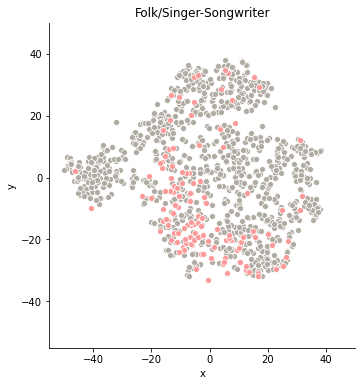

In [13]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_dummies, hue = 'Folk-SingerSongwriter', 
                 palette = ['#B1ACA3', '#fb9a99'], height = 5, aspect = 1.0)
g._legend.remove()
axes = g.axes.flatten()
axes[0].set_xlim((-55,50))
axes[0].set_ylim((-55,50))
axes[0].set_title("Folk/Singer-Songwriter");

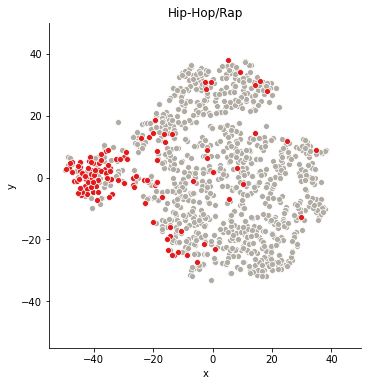

In [14]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_dummies, hue = 'HipHop-Rap',
                 palette = ["#B1ACA3", "#e31a1c"], height = 5, aspect = 1.0)
g._legend.remove()
axes = g.axes.flatten()
axes[0].set_xlim((-55,50))
axes[0].set_ylim((-55,50))
axes[0].set_title("Hip-Hop/Rap");

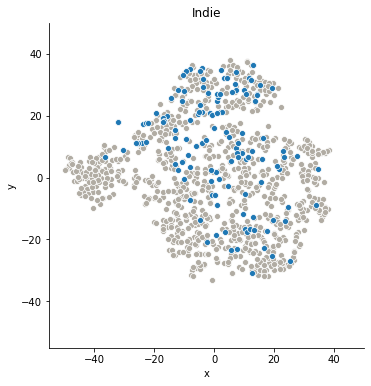

In [15]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_dummies, hue = 'Indie', 
                 palette = ["#B1ACA3", "#1f78b4"], height = 5, aspect = 1.0)
g._legend.remove()
axes = g.axes.flatten()
axes[0].set_xlim((-55,50))
axes[0].set_ylim((-55,50))
axes[0].set_title("Indie");

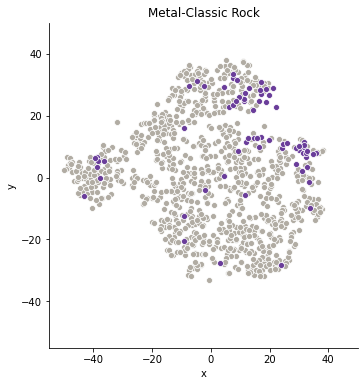

In [16]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_dummies, hue = 'Metal-ClassicRock', 
                 palette = ["#B1ACA3", "#6a3d9a"], height = 5, aspect = 1.0)
g._legend.remove()
axes = g.axes.flatten()
axes[0].set_xlim((-55,50))
axes[0].set_ylim((-55,50))
axes[0].set_title("Metal-Classic Rock");

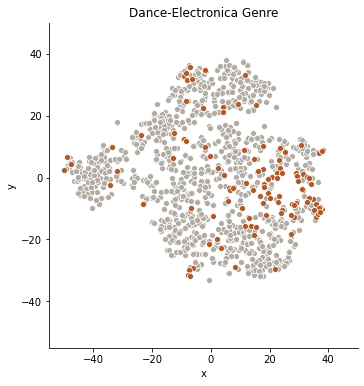

In [17]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_dummies, hue = 'Dance-Electronica', 
                 palette = ["#B1ACA3", "#b15928"], height = 5, aspect = 1.0)
g._legend.remove()
axes = g.axes.flatten()
axes[0].set_xlim((-55,50))
axes[0].set_ylim((-55,50))
axes[0].set_title("Dance-Electronica Genre");

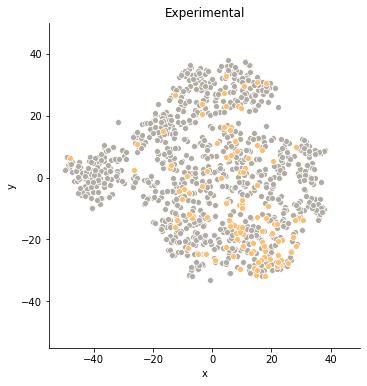

In [18]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_dummies, hue = 'Experimental',
                 palette = ["#B1ACA3", "#fdbf6f"], height = 5, aspect = 1.0)
g._legend.remove()
axes = g.axes.flatten()
axes[0].set_xlim((-55,50))
axes[0].set_ylim((-55,50))
axes[0].set_title("Experimental");

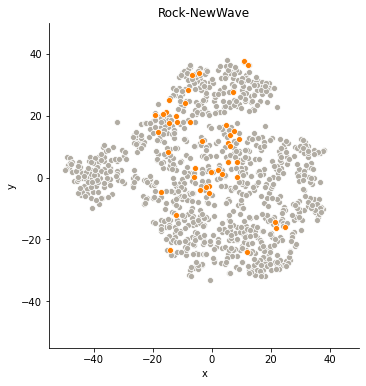

In [21]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_dummies, hue = 'Rock-NewWave', palette = ['#B1ACA3', '#ff7f00'], 
                 height = 5, aspect = 1.0)
g._legend.remove()
axes = g.axes.flatten()
axes[0].set_xlim((-55,50))
axes[0].set_ylim((-55,50))
axes[0].set_title("Rock-NewWave");

The other categories: ArtRock-SlowCore, AlternativeRnB-IndieSoul, and Electropop-Pop have much smaller numbers, so their clusters are harder to visualize because there is more variation. I didn't plot other, because that is naturally likely not to cluster.

### Plot Selected Artist and Albums

In [22]:
to_plot_albums = pd.concat([genre_components.iloc[:, 0], to_plot], axis = 1)

In [23]:
to_plot_artists = to_plot_albums[(to_plot_albums.album_artist.str.match(r'(.+artist:Sleater-Kinney)')) |
                                (to_plot_albums.album_artist.str.match(r'(.+artist:Robyn)')) |
                                (to_plot_albums.album_artist.str.match(r'(.+artist:Janelle)')) |
                                (to_plot_albums.album_artist.str.match(r'(.+artist:M.I.A.)')) |
                                (to_plot_albums.album_artist.str.match(r'(.+artist:Mitski)')) |
                                (to_plot_albums.album_artist.str.match(r'(.+artist:LCD Soundsystem)'))]

In [24]:
to_plot_artists['artist'] = to_plot_artists.album_artist.map(lambda x: x.split('artist:')[1])

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
to_plot_separate = pd.concat([to_plot_artists.iloc[:, :3], pd.get_dummies(to_plot_artists.artist)], axis = 1)

In [26]:
to_plot_separate.columns = ['album_artist', 'x', 'y', 'Janelle Monáe', 'LCD Soundsystem', 'MIA', 'Mitski',
                           'Robyn', 'Sleater-Kinney']

Text(0.5, 1.0, 'Sleater-Kinney Albums')

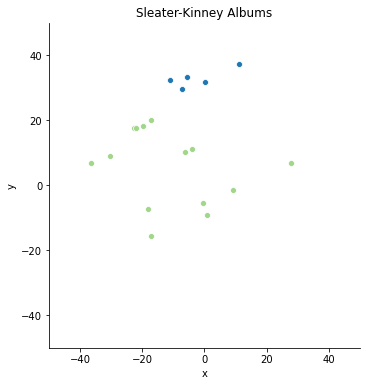

In [28]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_separate, hue = 'Sleater-Kinney', 
                 palette = ["#A1D68B", "#1f78b4"], height = 5, aspect = 1.0)
g._legend.remove()
axes = g.axes.flatten()
axes[0].set_xlim((-50,50))
axes[0].set_ylim((-50,50))
axes[0].set_title("Sleater-Kinney Albums")
#plt.savefig('../../slide_img/SK.png', transparent = True, bbox_inches='tight', dpi=300);

Text(0.5, 1.0, 'Janelle Monáe Albums')

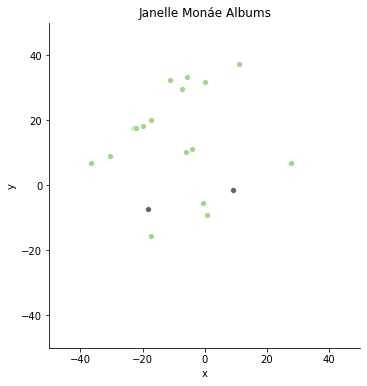

In [29]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_separate, hue = 'Janelle Monáe', 
                 palette = ["#A1D68B", "#5B6557"], height = 5, aspect = 1.0)
g._legend.remove()
axes = g.axes.flatten()
axes[0].set_xlim((-50,50))
axes[0].set_ylim((-50,50))
axes[0].set_title("Janelle Monáe Albums")
#plt.savefig('../../slide_img/JM.png', transparent = True, bbox_inches='tight', dpi=300);

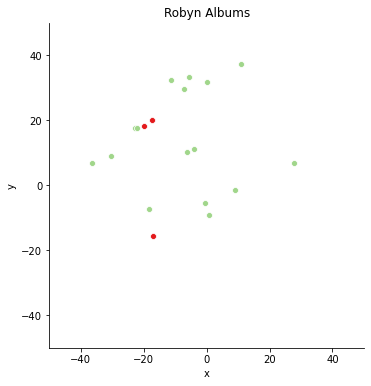

In [30]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_separate, hue = 'Robyn', 
                 palette = ["#A1D68B", "#e31a1c"], height = 5, aspect = 1.0)
g._legend.remove()
axes = g.axes.flatten()
axes[0].set_xlim((-50,50))
axes[0].set_ylim((-50,50))
axes[0].set_title("Robyn Albums")
#plt.savefig('../../slide_img/robyn.png', transparent = True, bbox_inches='tight', dpi=300);

Text(0.5, 1.0, 'Mitski Albums')

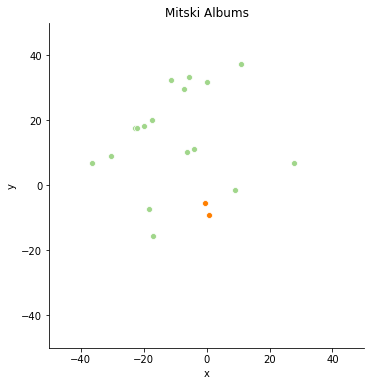

In [32]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_separate, hue = 'Mitski', 
                 palette = ["#A1D68B", "#ff7f00"], height = 5, aspect = 1.0)
axes = g.axes.flatten()
g._legend.remove()
axes[0].set_xlim((-50,50))
axes[0].set_ylim((-50,50))
axes[0].set_title("Mitski Albums")
#plt.savefig('../../slide_img/Mitski.png', transparent = True, bbox_inches='tight', dpi=300);

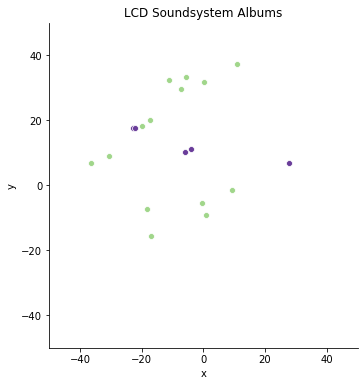

In [385]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_separate, hue = 'LCD Soundsystem', 
                 palette = ["#A1D68B", "#6a3d9a"], height = 5, aspect = 1.0)
axes = g.axes.flatten()
g._legend.remove()
axes[0].set_xlim((-50,50))
axes[0].set_ylim((-50,50))
axes[0].set_title("LCD Soundsystem Albums")
#plt.savefig('../../slide_img/LCDS.png', transparent = True, bbox_inches='tight', dpi=300);

Text(0.5, 1.0, 'M.I.A. Albums')

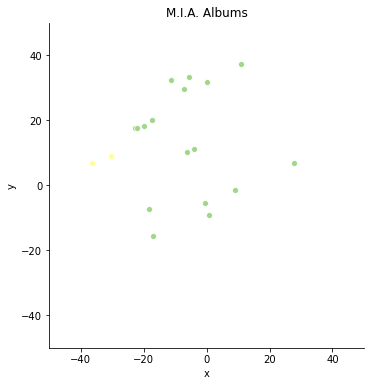

In [33]:
g = sns.pairplot(x_vars = 'x', y_vars = 'y', data = to_plot_separate, hue = 'MIA', 
                 palette = ["#A1D68B", "#ffff99"], height = 5, aspect = 1.0)
axes = g.axes.flatten()
g._legend.remove()
axes[0].set_xlim((-50,50))
axes[0].set_ylim((-50,50))
axes[0].set_title("M.I.A. Albums")
#plt.savefig('../../slide_img/MIA.png', transparent = True, bbox_inches='tight', dpi=300);